In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
from pytesseract import Output

In [2]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
# noise removal
def remove_noise(image):
    return cv2.GaussianBlur(image, (5,5), 0)

In [4]:
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [5]:
#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

In [6]:
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

In [7]:
#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

In [8]:
def plot_two_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1= fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    ax2= fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

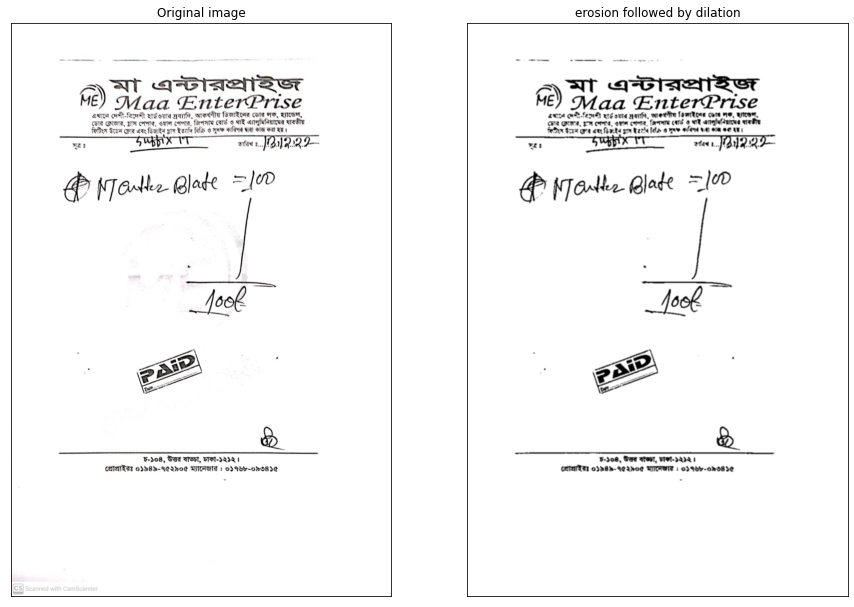

In [9]:
image = cv2.imread('data/image-3.jpeg')
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(thresh)
g_blur = remove_noise(opening)
plot_two_images(image, g_blur, 'Original image', 'erosion followed by dilation')

extract  9  :  ‘Maa

extract  25  :  .

extract  26  :  
extract  45  :  
extract  51  :  
extract  55  :  রবী

extract  62  :  
extract  66  :  শকটুনল0

extract  70  :  . পা

extract  74  :  2552

extract  86  :  


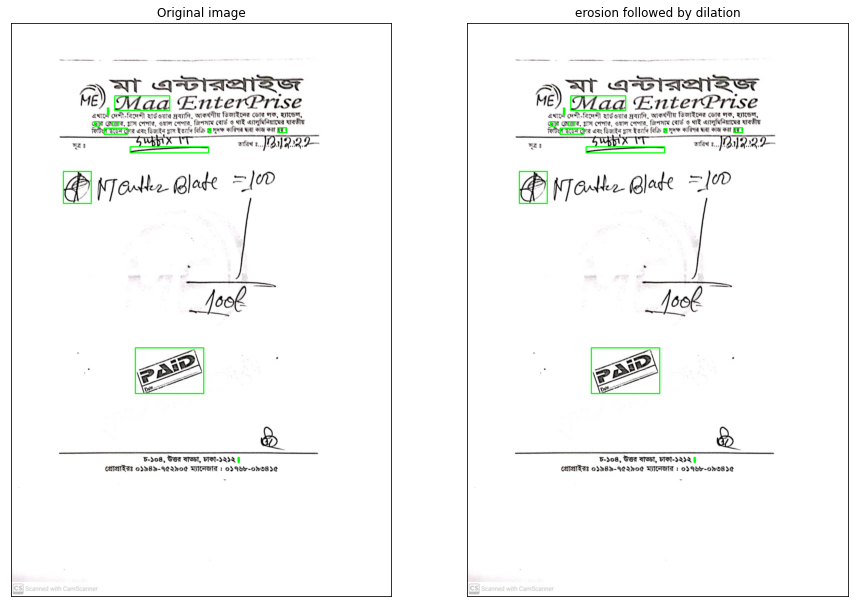

In [10]:
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 50:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        roi = g_blur[y:y+h, x:x+w]
        img = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        ocr_result = pytesseract.image_to_string(roi,lang='ben+eng', config='--psm 6')
        print('extract ',i,' : ',ocr_result)

plot_two_images(image, image, 'Original image', 'erosion followed by dilation')